In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1.plotting



In [9]:
fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl()

In [10]:
session = fastf1.get_session(2022, 1, 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


In [11]:
# TODO: Change to top 3 instead of just race winner

# winner = session.results['Abbreviation'][:1]
winner = session.results[:1]
race_winner = winner.iloc[0,2]
team_color = '#'+winner.iloc[0,4]
full_name = winner.iloc[0,7]

winner_fastest_lap = session.laps.pick_driver(race_winner).pick_fastest()

In [16]:
winner_car_data = winner_fastest_lap.get_car_data(pad=1,pad_side="both").add_distance()
winner_pos_data = winner_fastest_lap.get_pos_data(pad=1, pad_side="both")

In [ ]:
# def find_corners(tel):
#     corners = []
#     tel.reset_index()
#     corner_cnt = 1
#     in_corner = False
#     start, end = None, None

#     for _, row in tel.iterrows():
#         if (row['CurrentAction'] == 'Cornering') and not in_corner:
#             in_corner = True
#             s = int(row['Distance'])
#             if not start or start > s:
#                 start = s

#         if (row['CurrentAction'] == 'Full Throttle') and in_corner:
#             in_corner = False
#             corner_cnt += 1
#             corners.append((start, int(row['Distance'])))
#             start = None
#     return corners

# corners_by_car = []
# # Decorate telemetry with driver action
# for tel in telemetry:
#     tel.loc[tel['Brake'] > 0, 'CurrentAction'] = 'Cornering'
#     tel.loc[tel['Throttle'] > 97, 'CurrentAction'] = 'Full Throttle'
#     tel.loc[(tel['Brake'] == 0) & (tel['Throttle'] < 97), 'CurrentAction'] = 'Cornering'

#     # find corners for lap
#     corners_by_car.append(find_corners(tel))

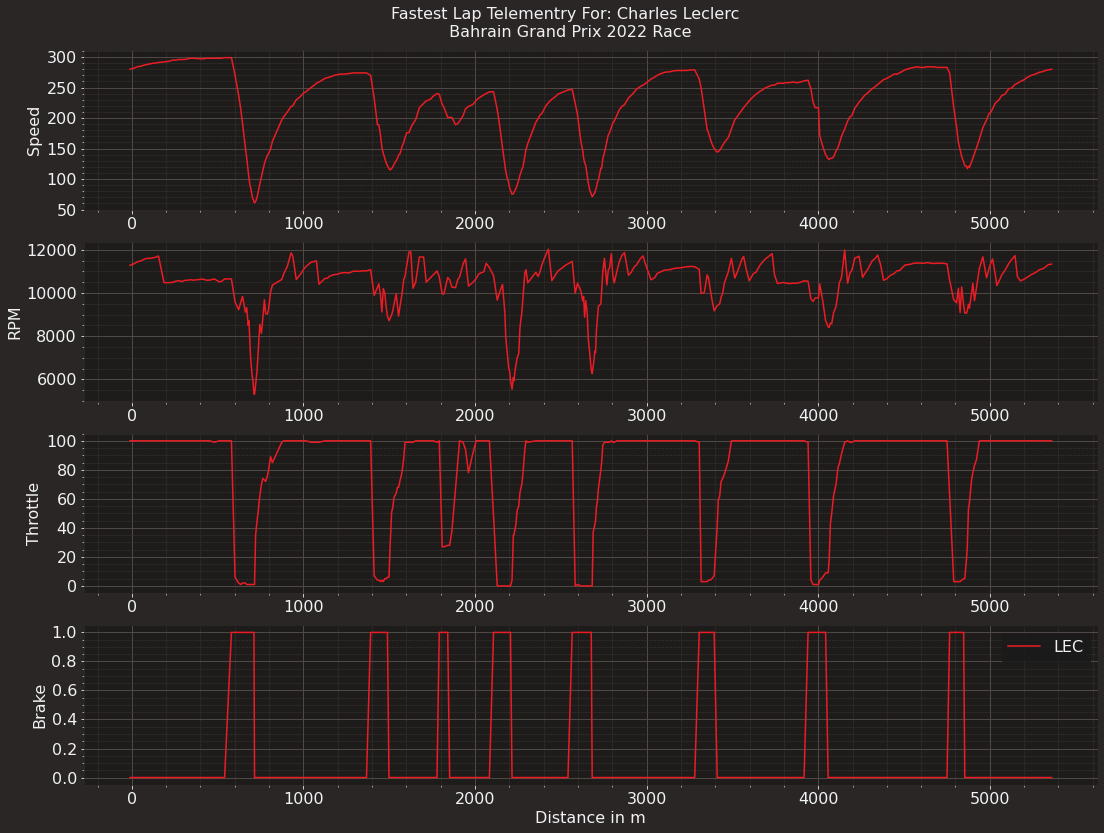

In [13]:
# winner_color = fastf1.plotting.team_color(team[0])

metrics = ['Speed', 'RPM', 'Throttle', 'Brake']

fig, ax = plt.subplots(len(metrics), figsize=(16,12))
ax[0].plot(winner_car_data['Distance'], winner_car_data['Speed'], color=team_color, label=race_winner)
ax[1].plot(winner_car_data['Distance'], winner_car_data['RPM'], color=team_color, label=race_winner)
ax[2].plot(winner_car_data['Distance'], winner_car_data['Throttle'], color=team_color, label=race_winner)
ax[3].plot(winner_car_data['Distance'], winner_car_data['Brake'], color=team_color, label=race_winner)

for i, ax in enumerate(ax):
    for label in ax.xaxis.get_ticklabels():
        label.set_fontsize(16)

    for label in ax.yaxis.get_ticklabels():
        label.set_fontsize(16)

    metric = metrics[i]
    ax.set_ylabel(metric, size=16)

ax.set_xlabel('Distance in m', size=16)

ax.legend(fontsize=16)
plt.suptitle(f"Fastest Lap Telementry For: {full_name} \n "
             f"{session.event['EventName']} {session.event.year} Race", size=16)

plt.subplots_adjust(left=0.08, right=0.96, top=0.93, bottom=0.08)
# plt.savefig("test.png", dpi=600)
             
plt.show()


## changes